<a href="https://colab.research.google.com/github/janevm/MyFirstAndroidApp/blob/main/codedesk_01ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
def scrape_hotel(city):
 url="https://www.trip.com/hotels/list?city=359&cityName=Bangkok&provinceId=0&countryId=4&districtId=0&checkin=2023/09/07&checkout=2023/09/08&barCurr=USD&searchType=CT&searchWord=Bangkok&crn=1&adult=2&children=0&searchBoxArg=t&travelPurpose=0&ctm_ref=ix_sb_dl&domestic=true"
 response=requests.get(url)
 soup=BeautifulSoup(response.text,'html.parser')

In [34]:
hotels=[]
hotel_elements = soup.select(".hotel-info")

In [35]:
for element in hotel_elements:
  print(element.get_text())

Sathorn Vista, Bangkok - Marriott Executive Apartments4.4/5Very Good136 reviews"Great rooms""Great stay!"Silom/Sathorn  1.5  km from downtown (straight line distance)Show on MapOne Bedroom Deluxe SuiteEarn US$ 3.53 in Trip CoinsLast booked 3 hours agoSpecial Discount17% OffAfter tax US$ 130Check Availability
Dusitd2 Samyan BangkokOpened in 20234.4/5Very Good88 reviews"Great stay!""Clean and tidy"Silom/Sathorn  420 m from downtown (straight line distance)Show on MapSuperior King RoomEarn US$ 2.73 in Trip CoinsOnly 1 room leftAfter tax US$ 113Check Availability
Hotel Muse Bangkok Langsuan - MGallery4.4/5Very Good317 reviews"Great service""Great location"Chidlom  2.5  km from downtown (straight line distance)Show on MapJatu Deluxe Twin RoomLast booked 58 mins agoSpecial Discount17% OffAfter tax US$ 94Check Availability
Mercure Bangkok Siam4.4/5Very Good489 reviews"Great service""Easy to get around"Siam  2.2  km from downtown (straight line distance)Show on MapSuperior Queen RoomEarn US$ 2

In [36]:
for element in hotel_elements:
    name=element.select_one(".list-card-title").text.strip()
    rating=element.select_one(".score").text.strip()
    price=element.select_one(".real.labelColor")
    hotels.append({"name":name, "rating":rating, "price":price})
    print (hotels)

[{'name': 'Sathorn Vista, Bangkok - Marriott Executive Apartments', 'rating': '4.4/5', 'price': None}]
[{'name': 'Sathorn Vista, Bangkok - Marriott Executive Apartments', 'rating': '4.4/5', 'price': None}, {'name': 'Dusitd2 Samyan BangkokOpened in 2023', 'rating': '4.4/5', 'price': None}]
[{'name': 'Sathorn Vista, Bangkok - Marriott Executive Apartments', 'rating': '4.4/5', 'price': None}, {'name': 'Dusitd2 Samyan BangkokOpened in 2023', 'rating': '4.4/5', 'price': None}, {'name': 'Hotel Muse Bangkok Langsuan - MGallery', 'rating': '4.4/5', 'price': None}]
[{'name': 'Sathorn Vista, Bangkok - Marriott Executive Apartments', 'rating': '4.4/5', 'price': None}, {'name': 'Dusitd2 Samyan BangkokOpened in 2023', 'rating': '4.4/5', 'price': None}, {'name': 'Hotel Muse Bangkok Langsuan - MGallery', 'rating': '4.4/5', 'price': None}, {'name': 'Mercure Bangkok Siam', 'rating': '4.4/5', 'price': None}]
[{'name': 'Sathorn Vista, Bangkok - Marriott Executive Apartments', 'rating': '4.4/5', 'price': 

In [85]:
prices = soup.find_all("span", class_="hotel-price")
for price in prices:
    print(price.text.strip())

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 9
No. of testing examples: 3


In [91]:
train = training_data
test = testing_data

In [76]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


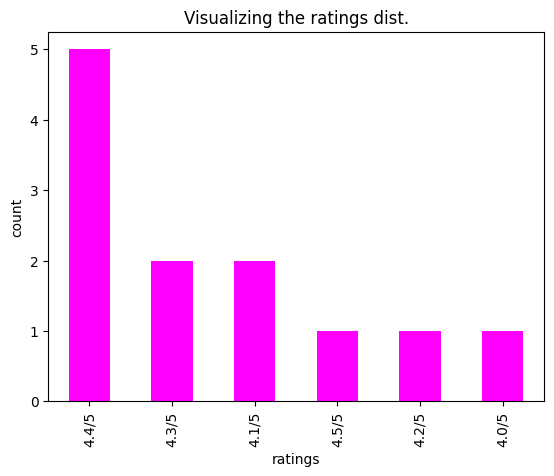

In [78]:
df['rating'].value_counts().plot.bar(color = 'magenta')
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

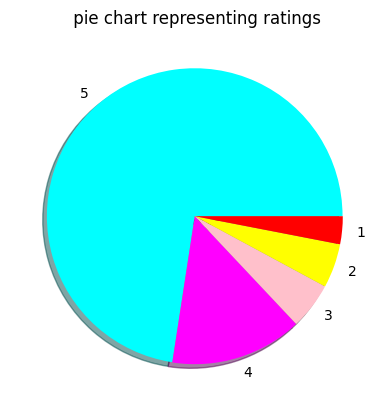

In [80]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['cyan', 'magenta', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings')
plt.show()

In [104]:
df['rating'].value_counts()

4.4/5    5
4.3/5    2
4.1/5    2
4.5/5    1
4.2/5    1
4.0/5    1
Name: rating, dtype: int64

In [108]:
average_price = df[ "price" ].mean()

In [109]:
highest_rated_hotel = df[df["rating"] == df["rating"].max()].iloc[0]

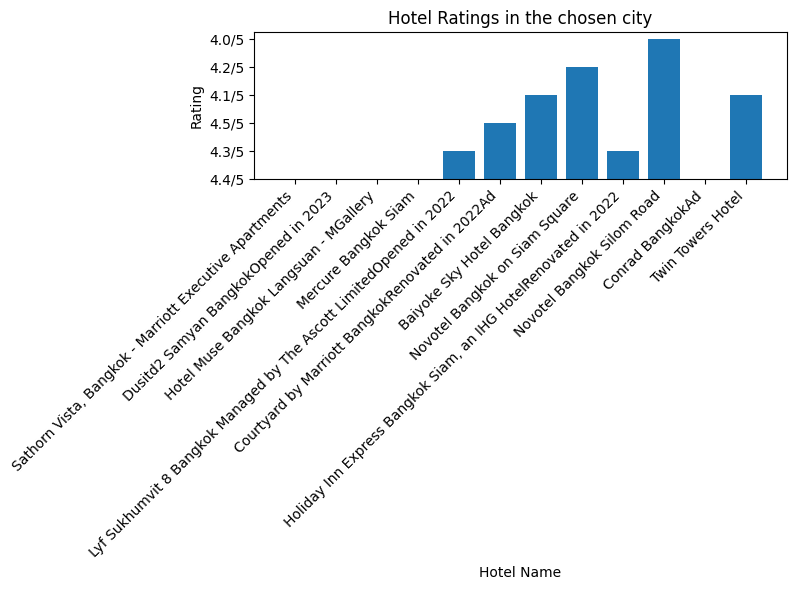

(nan,
 name      Courtyard by Marriott BangkokRenovated in 2022Ad
 rating                                               4.5/5
 price                                                 None
 Name: 5, dtype: object)

In [110]:
plt.figure(figsize=( 8 , 6 ))
plt.bar(df[ "name" ], df[ "rating" ])
plt.xticks(rotation= 45 , ha= "right" )
plt.xlabel( "Hotel Name" )
plt.ylabel( "Rating" )
plt.title( "Hotel Ratings in the chosen city" )
plt.tight_layout()
plt.show()
average_price, highest_rated_hotel

In [113]:
print(f"Average hotel price in {chosen_city}: ${average_price:.2f}")
print(f"Highest-rated hotel in {chosen_city}: {highest_rated_hotel['name']} (Rating: {highest_rated_hotel['rating']})")

Average hotel price in Bangkok: $nan
Highest-rated hotel in Bangkok: Courtyard by Marriott BangkokRenovated in 2022Ad (Rating: 4.5/5)
